### Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, MonthLocator

# Getting Started

In [3]:
dataset = pd.read_csv('opsd_germany_daily.csv')
dataset.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
dataset.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


# Indexing the dataset and creating additional columns for it

In [ ]:
# setting the datee as the index
dataset.set_index('Date', inplace=True)
dataset.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [68]:
# adding year, month, and weekday as separete columns
dataset['Year'] = pd.DatetimeIndex(dataset.index).year
dataset['Month'] = pd.DatetimeIndex(dataset.index).month
dataset['Weekday'] = pd.DatetimeIndex(dataset.index).weekday
dataset['DayOfYear'] = pd.DatetimeIndex(dataset.index).dayofyear

# mapping the weekday to the actual name
dataset['Weekday'] = dataset['Weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

dataset.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,DayOfYear
Date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,2
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,3
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,4
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,5


# Germany’s Daily Energy Consumption 2006-2017

Use df.plot(...) to plot a time series of Germany’s daily energy Consumption from 2006-2017. Since pandas’ DataFrame plotting methods rely on matplotlib, you can use matplotlib.pyplot to style your plots. Set a custom marker, linestyle, title as well as labels for the x-, and y-axis.

Text(0, 0.5, 'Consumption in GWh')

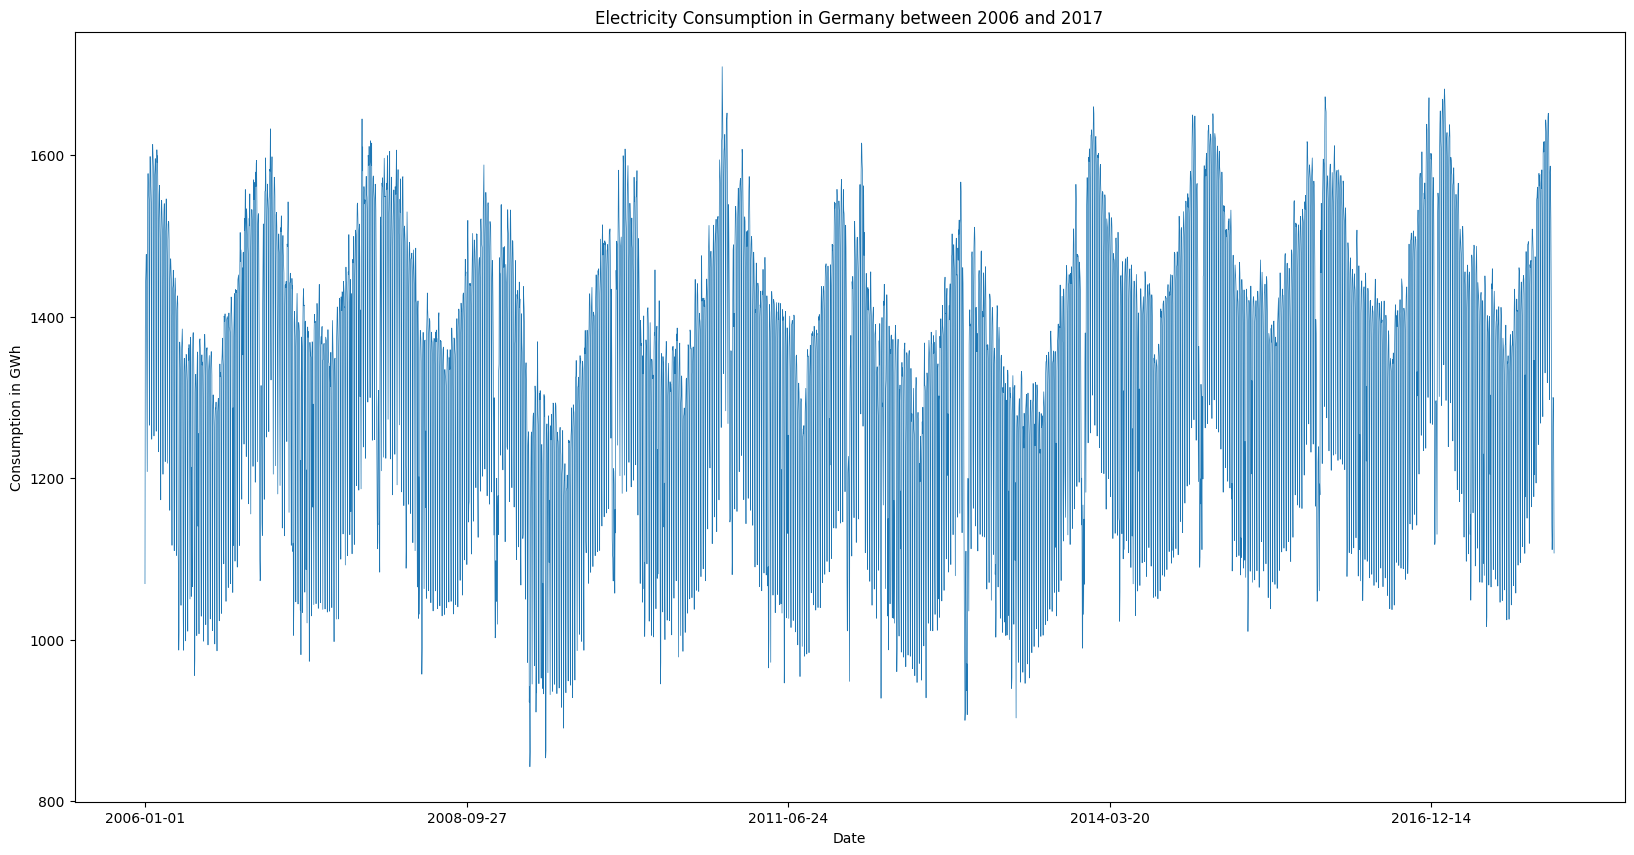

In [88]:
plt.figure(figsize=(20, 10))
dataset['Consumption'].plot(linestyle='-', linewidth=0.5)
plt.title('Electricity Consumption in Germany between 2006 and 2017')
plt.xlabel('Date')
plt.ylabel('Consumption in GWh')

# Subplots Showing Daily Consumption and Solar-, Wind-Generation
Next, generate one figure with three subplots containing time series for Wind, Solar and energy Consumption. Ensure that you properly represent the different magnitudes of renewable energy generation and power consumption by scaling the y-axis accordingly!

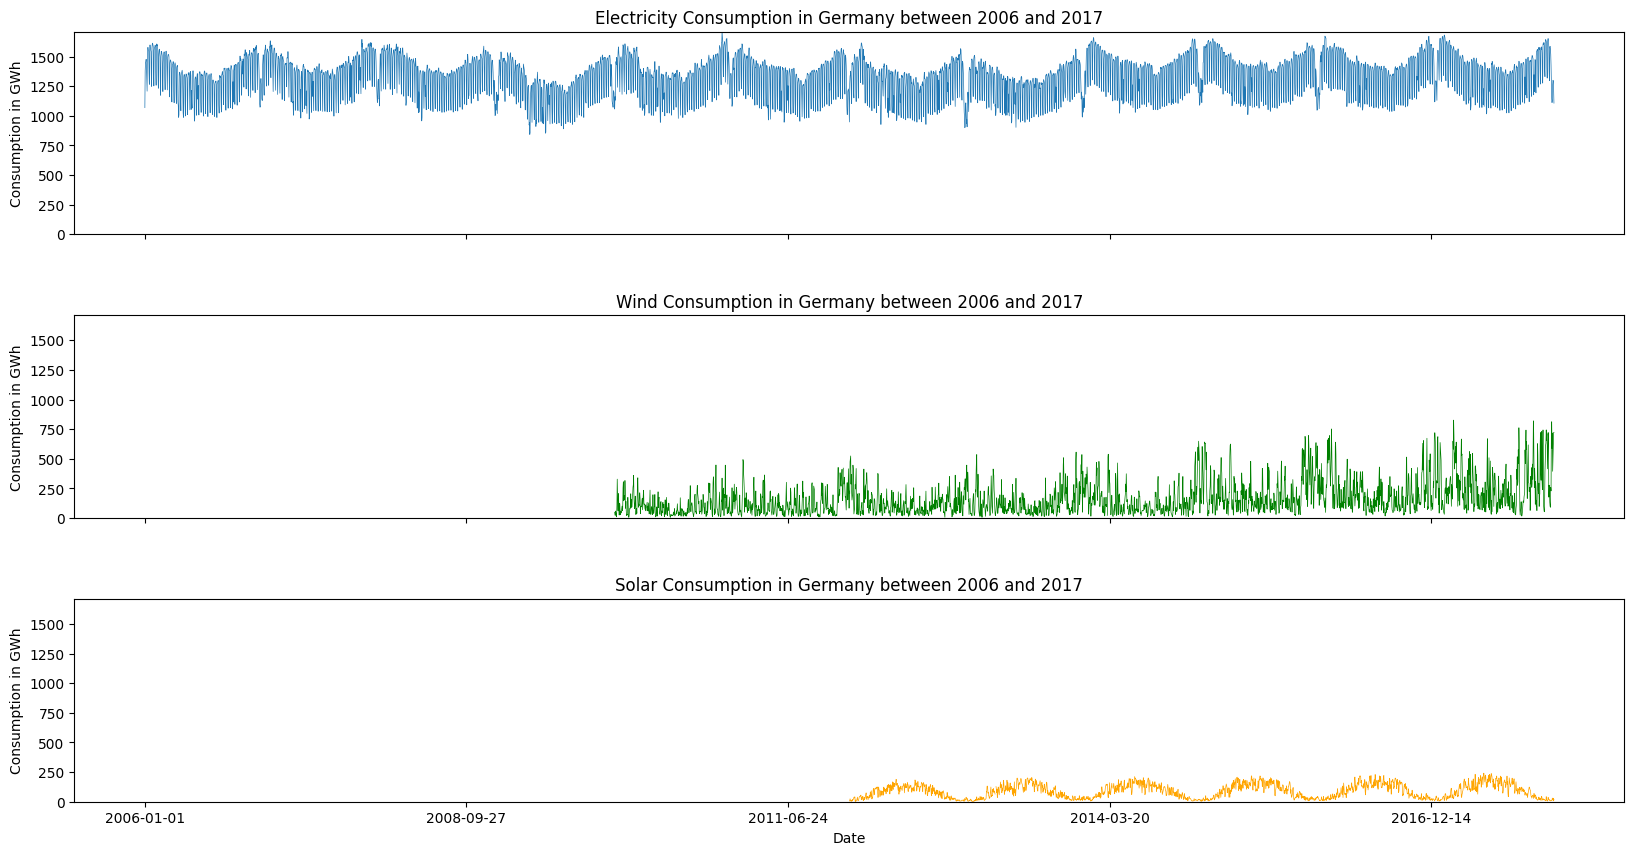

In [86]:
# creating a subplot
fig, ax = plt.subplots(3,1, figsize=(20, 10), sharex=True, sharey=True)


# plot 'Consumption'
dataset['Consumption'].plot(ax=ax[0], linestyle='-', linewidth=0.5)
ax[0].set_title('Electricity Consumption in Germany between 2006 and 2017')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Consumption in GWh')
ax[0].set_ylim(0, dataset['Consumption'].max())

# plot 'Wind'
dataset['Wind'].plot(ax=ax[1], linestyle='-', linewidth=0.5, color='green')
ax[1].set_title('Wind Consumption in Germany between 2006 and 2017')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Consumption in GWh')
ax[1].set_ylim(0, dataset['Consumption'].max())

# plot 'Solar'
dataset['Solar'].plot(ax=ax[2], linestyle='-', linewidth=0.5, color='orange')
ax[2].set_title('Solar Consumption in Germany between 2006 and 2017')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Consumption in GWh')
ax[2].set_ylim(0, dataset['Consumption'].max())

# adjust spacing between plots
plt.subplots_adjust(hspace=0.4)

plt.show()


# Can you Spot Patterns? 

Select a single year from the dataset using pandas’ timebased indexing (df.loc[...]) for
further examination. Plot this years Consumption in a time series plot. Be prepared to comment on what you see next session!

Next, Find a way to plot a boxplot showing the monthly energy Consumption in Germany from 2006-2017. You may e.g. use seaborn for this. What do you see?


In [91]:
# selecting the yer
SELECTED_YEAR = 2013
subset = dataset.loc[dataset['Year'] == SELECTED_YEAR]

subset.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,DayOfYear
Date,,,,,,,,
2013-01-01,906.910,262.438,14.218,276.656,2013,1,Tuesday,1
2013-01-02,1160.174,224.867,26.010,250.877,2013,1,Wednesday,2
2013-01-03,1199.565,387.143,6.058,393.201,2013,1,Thursday,3
2013-01-04,1198.952,342.443,4.976,347.419,2013,1,Friday,4
2013-01-05,1108.271,140.410,4.970,145.380,2013,1,Saturday,5


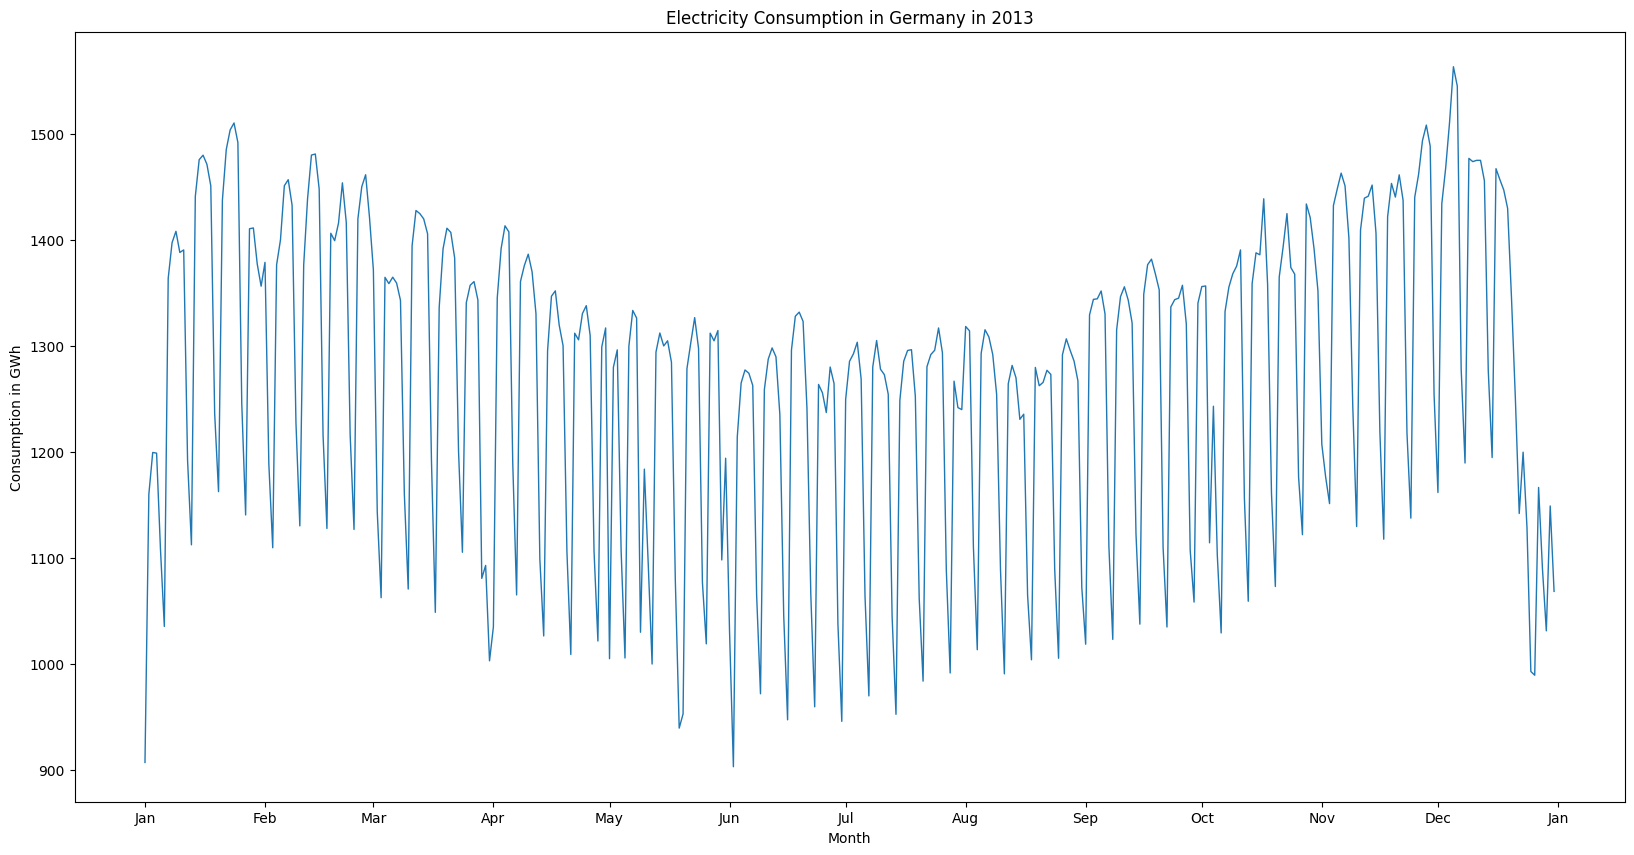

In [105]:
# plotting the plot
plt.figure(figsize=(20, 10))
plt.plot(subset['Consumption'], label='Consumption', linestyle='-', linewidth=1)
plt.xlabel('Month')

# select months on x-axis
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))

plt.ylabel('Consumption in GWh')
plt.title('Electricity Consumption in Germany in {}'.format(SELECTED_YEAR))
plt.show()